In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('/content/Invistico_Airline.csv')

In [6]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [7]:
plt.style.use('seaborn')
pastel_palette = sns.color_palette("pastel")

<ipython-input-7-aade570fd846>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

<ipython-input-9-69a2c62d79a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfaction', data=df, palette=pastel_palette)
<ipython-input-9-69a2c62d79a0>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='satisfaction', data=df, palette=pastel_palette)


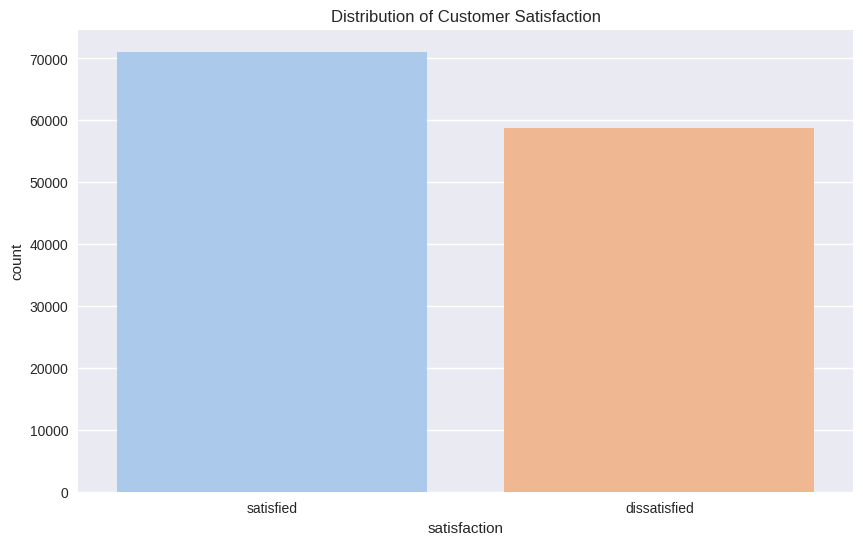

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='satisfaction', data=df, palette=pastel_palette)
plt.title('Distribution of Customer Satisfaction')
plt.show()

<ipython-input-10-e68d552507b5>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Gender', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
<ipython-input-10-e68d552507b5>:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Customer Type', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
<ipython-input-10-e68d552507b5>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x='Age', hue='satisfaction', kde=True, ax=axes[1, 0], palette=pastel_palette)
<ipython-input-10-e68d552507b5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Age', data=df, ax=axes[1, 1], palette=pastel_palette)


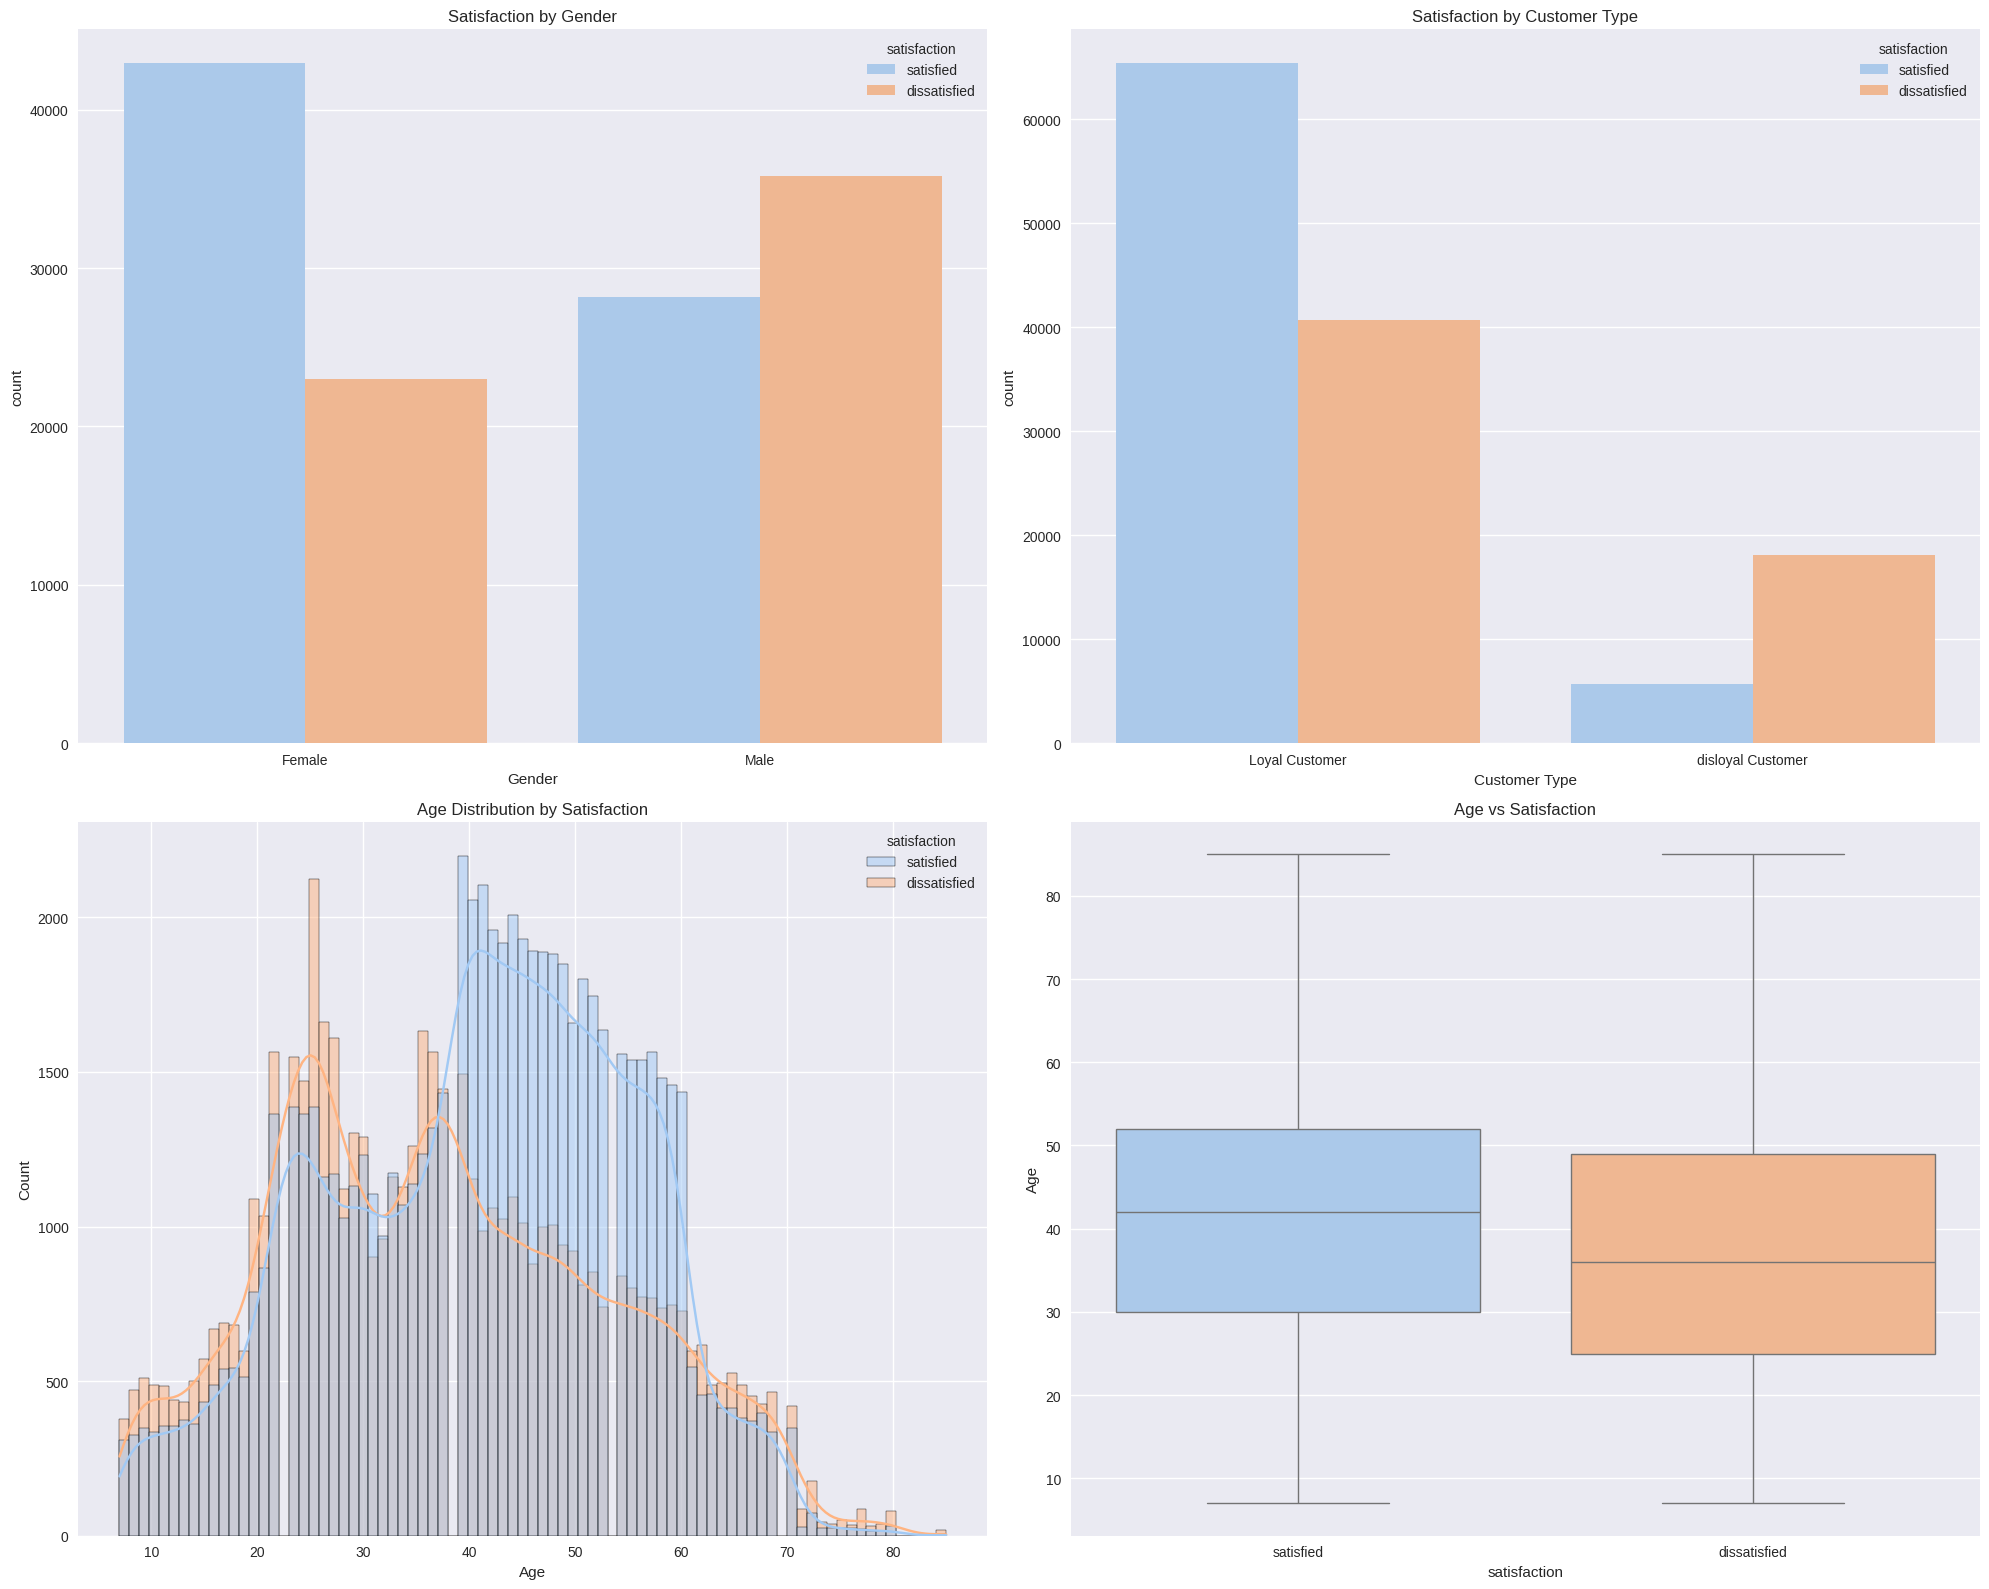

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.countplot(x='Gender', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
axes[0, 0].set_title('Satisfaction by Gender')

sns.countplot(x='Customer Type', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
axes[0, 1].set_title('Satisfaction by Customer Type')

sns.histplot(data=df, x='Age', hue='satisfaction', kde=True, ax=axes[1, 0], palette=pastel_palette)
axes[1, 0].set_title('Age Distribution by Satisfaction')

sns.boxplot(x='satisfaction', y='Age', data=df, ax=axes[1, 1], palette=pastel_palette)
axes[1, 1].set_title('Age vs Satisfaction')

plt.tight_layout()
plt.show()

<ipython-input-11-f46017d14ce7>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Type of Travel', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
<ipython-input-11-f46017d14ce7>:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Class', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
<ipython-input-11-f46017d14ce7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction', y='Flight Distance', data=df, ax=axes[1, 0], palette=pastel_palette)
<ipython-input-11-f46017d14ce7>:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x='satisfaction', y='Flight Distance', data=df, ax=axes[1, 0], palette=paste

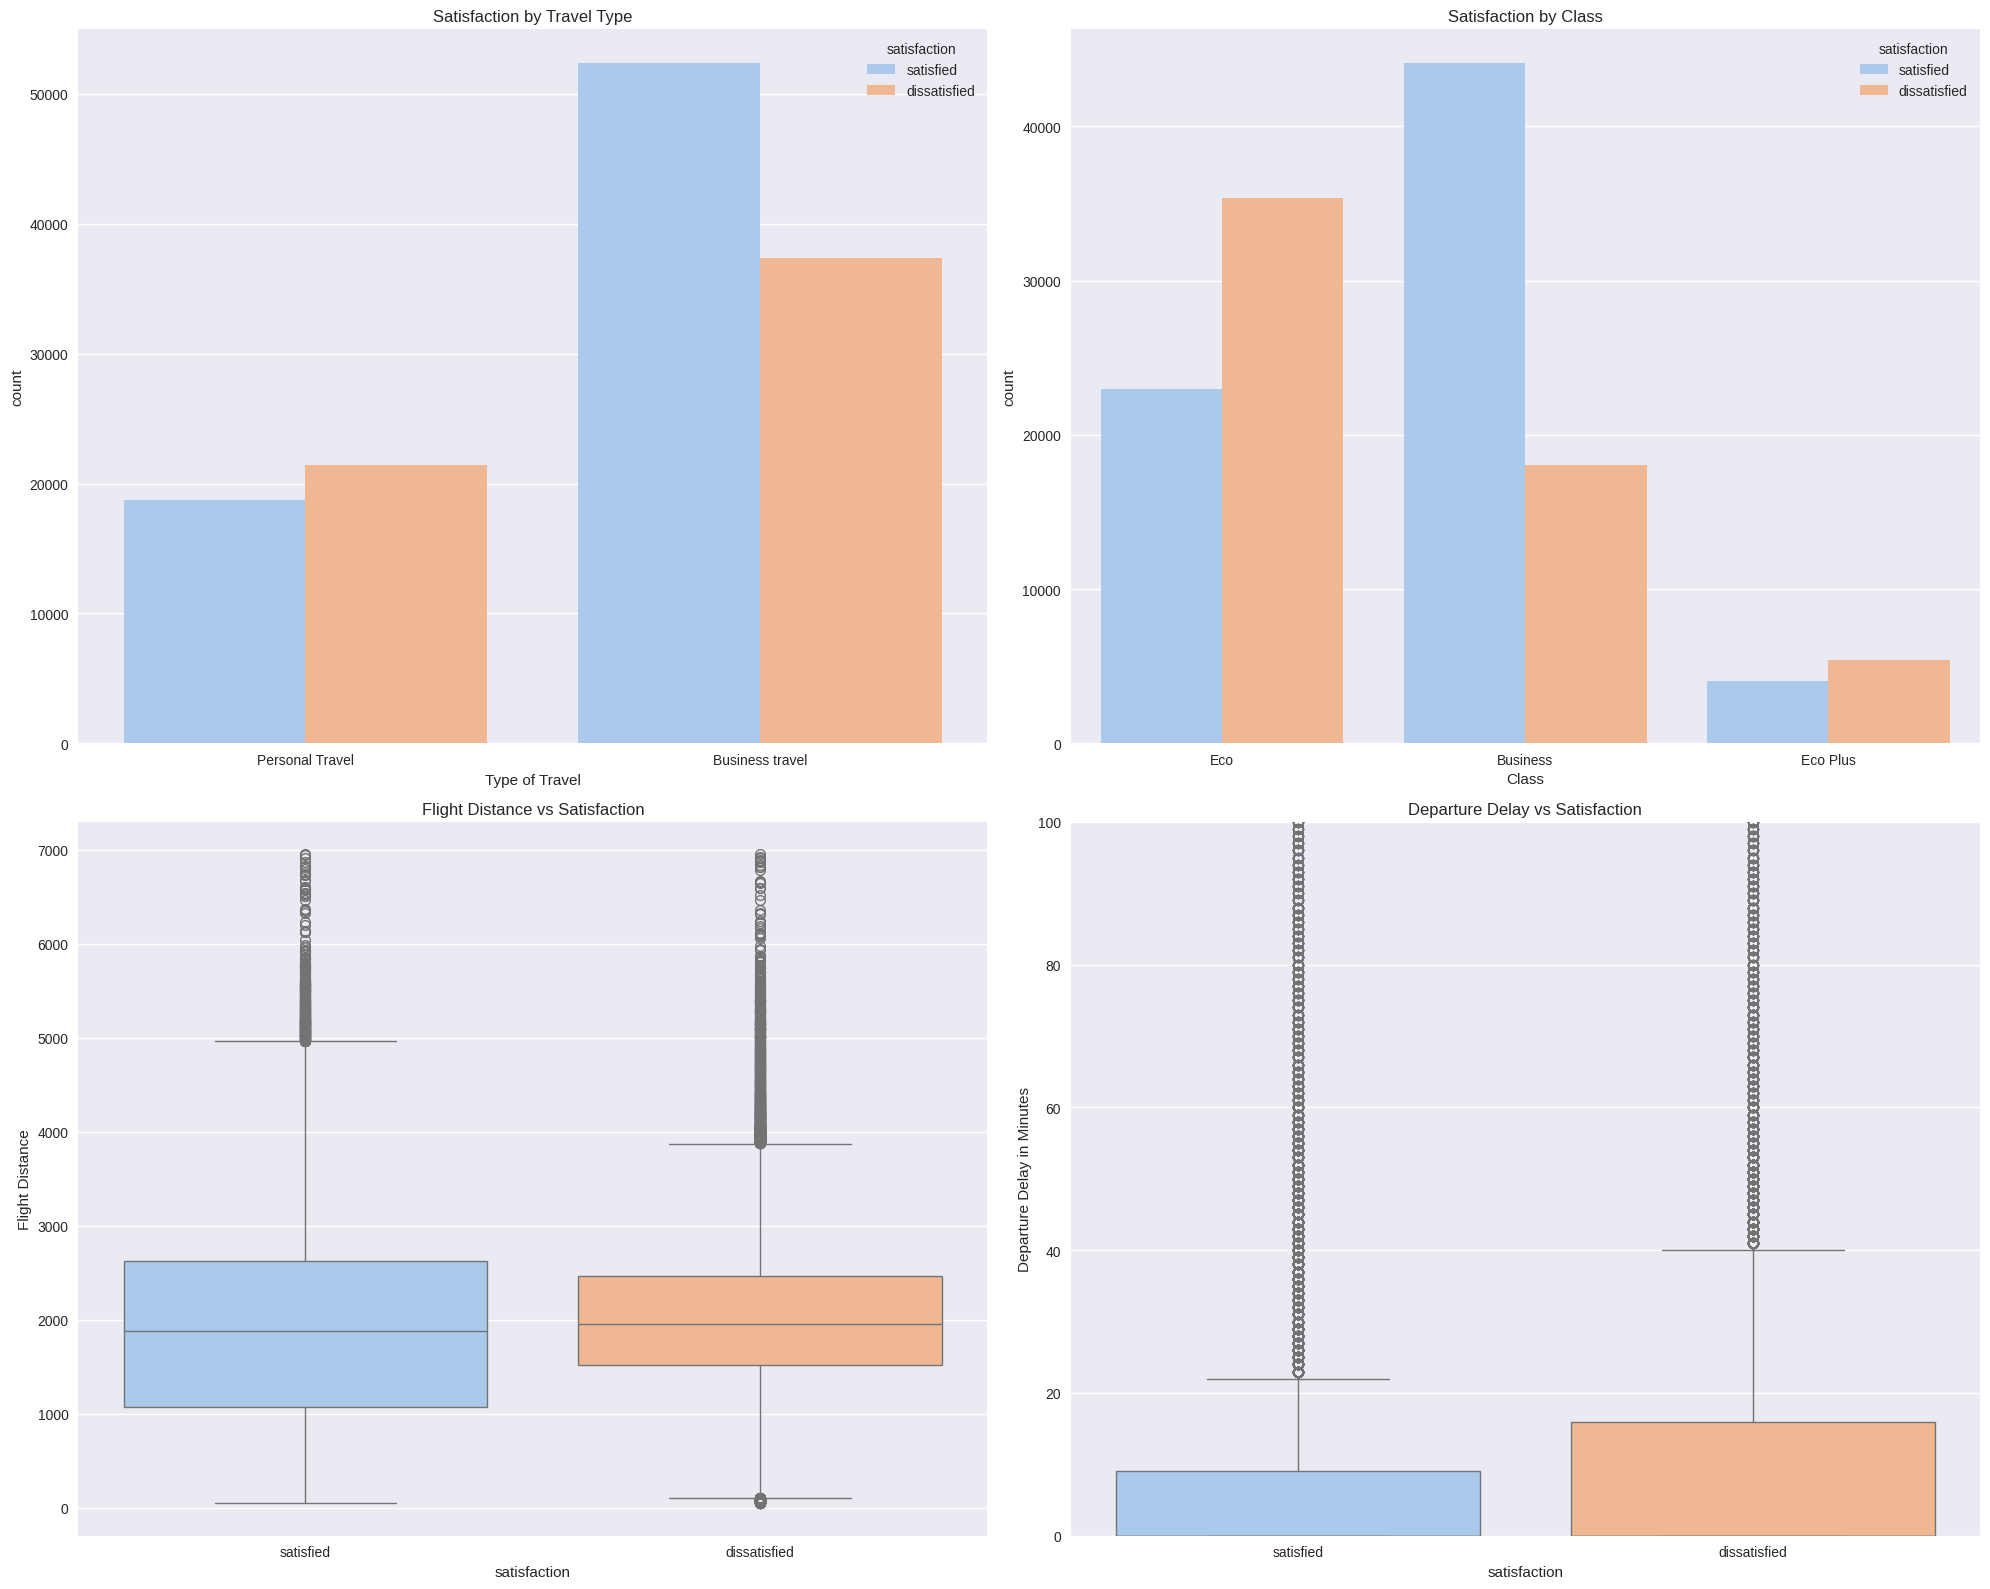

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

sns.countplot(x='Type of Travel', hue='satisfaction', data=df, ax=axes[0, 0], palette=pastel_palette)
axes[0, 0].set_title('Satisfaction by Travel Type')

sns.countplot(x='Class', hue='satisfaction', data=df, ax=axes[0, 1], palette=pastel_palette)
axes[0, 1].set_title('Satisfaction by Class')

sns.boxplot(x='satisfaction', y='Flight Distance', data=df, ax=axes[1, 0], palette=pastel_palette)
axes[1, 0].set_title('Flight Distance vs Satisfaction')

sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df, ax=axes[1, 1], palette=pastel_palette)
axes[1, 1].set_title('Departure Delay vs Satisfaction')
axes[1, 1].set_ylim(0, 100) 

plt.tight_layout()
plt.show()


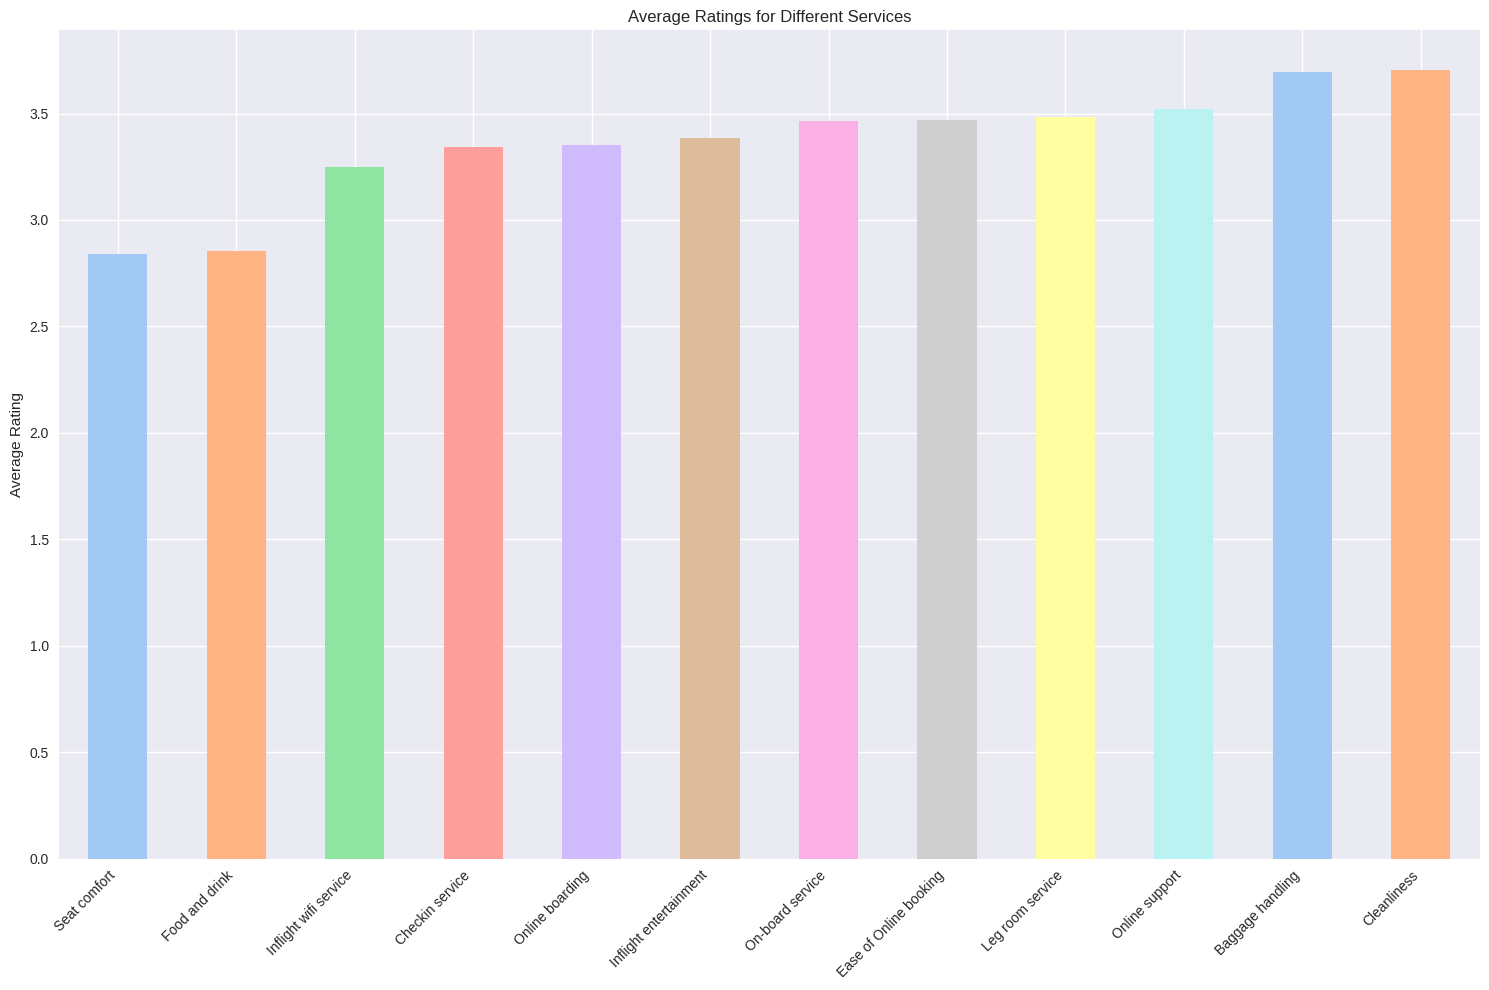

In [12]:
service_cols = ['Seat comfort', 'Food and drink', 'Inflight wifi service',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Cleanliness', 'Online support',
                'Ease of Online booking', 'Online boarding']

fig, ax = plt.subplots(figsize=(15, 10))
df[service_cols].mean().sort_values().plot(kind='bar', ax=ax, color=pastel_palette)
ax.set_title('Average Ratings for Different Services')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

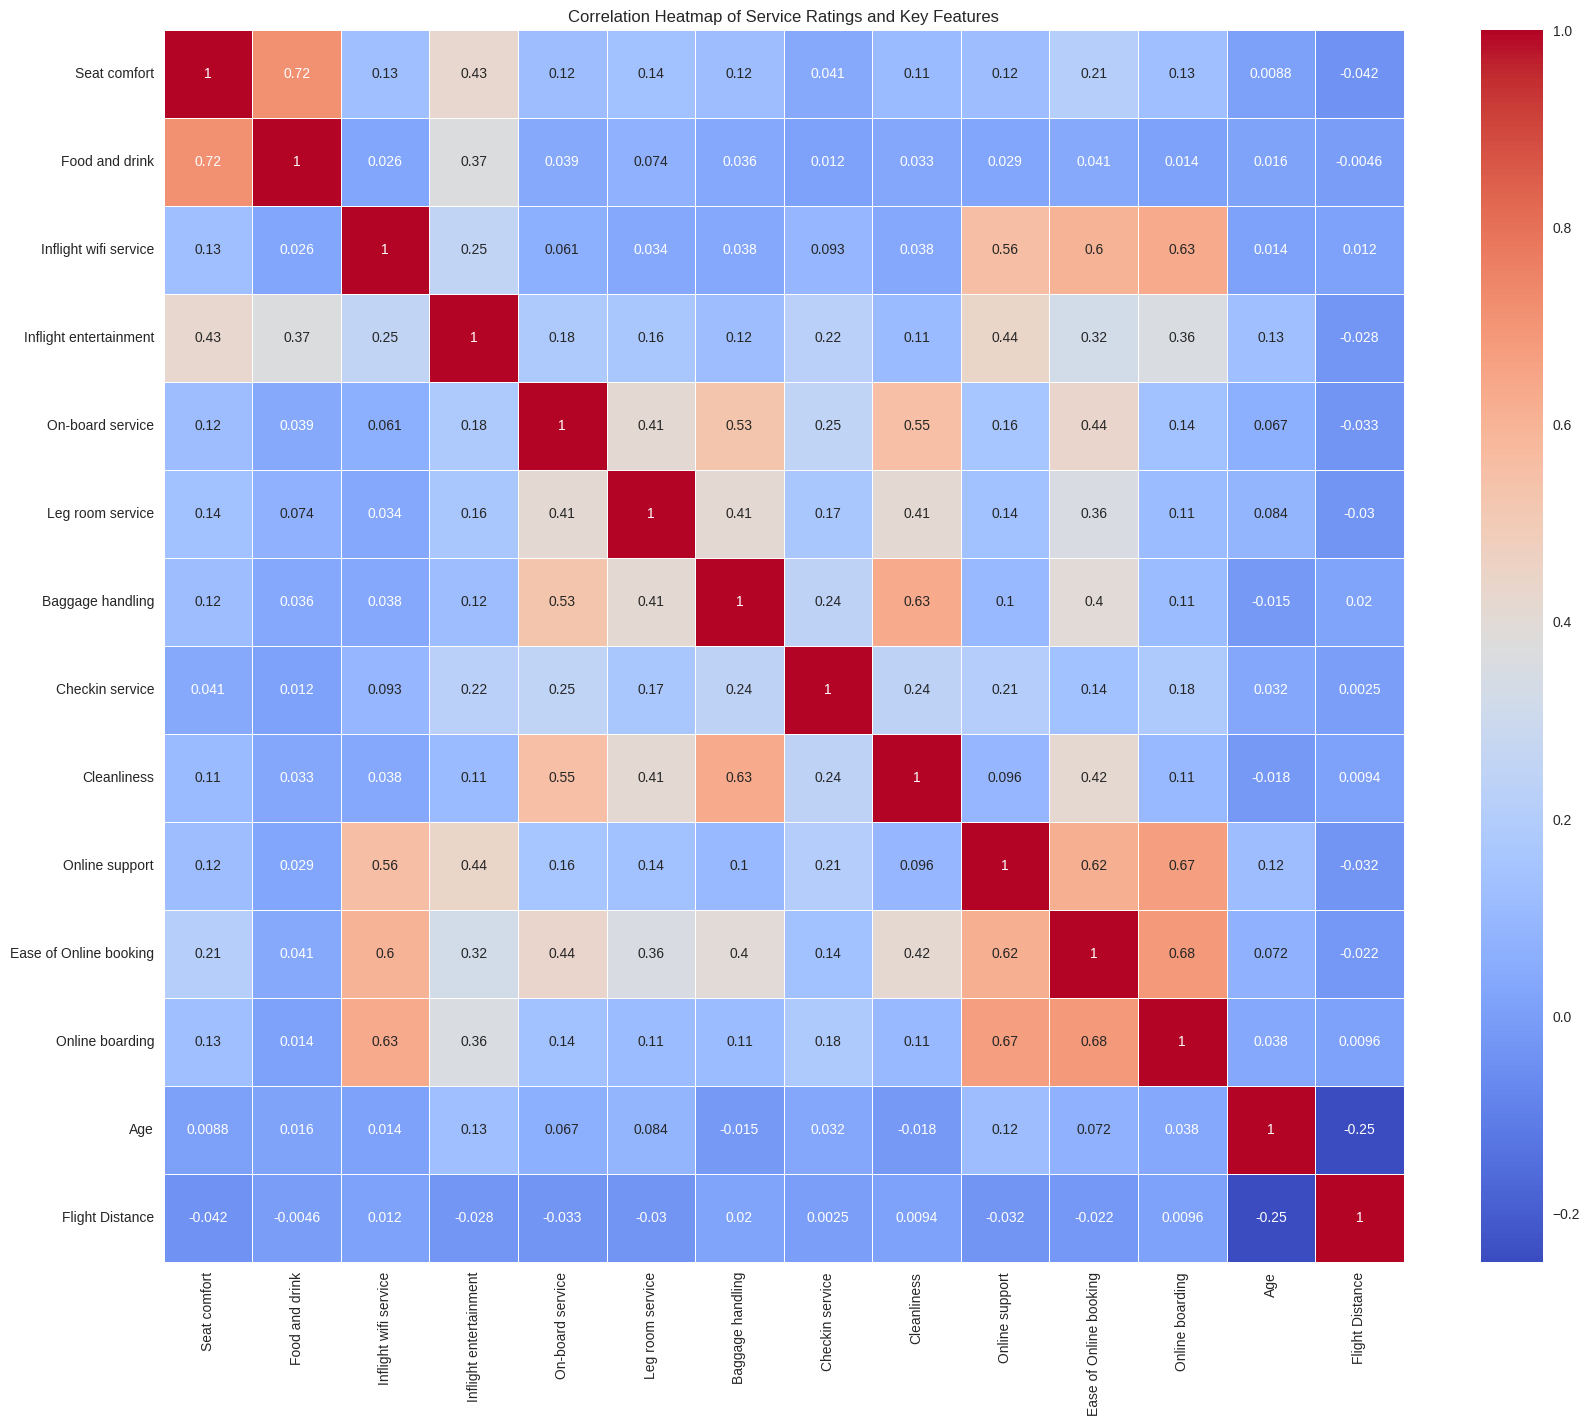

In [13]:
plt.figure(figsize=(20, 16))
sns.heatmap(df[service_cols + ['Age', 'Flight Distance']].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Service Ratings and Key Features')
plt.show()

<ipython-input-15-9cbf781059ba>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_rate = df.groupby('Distance_Bin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean())


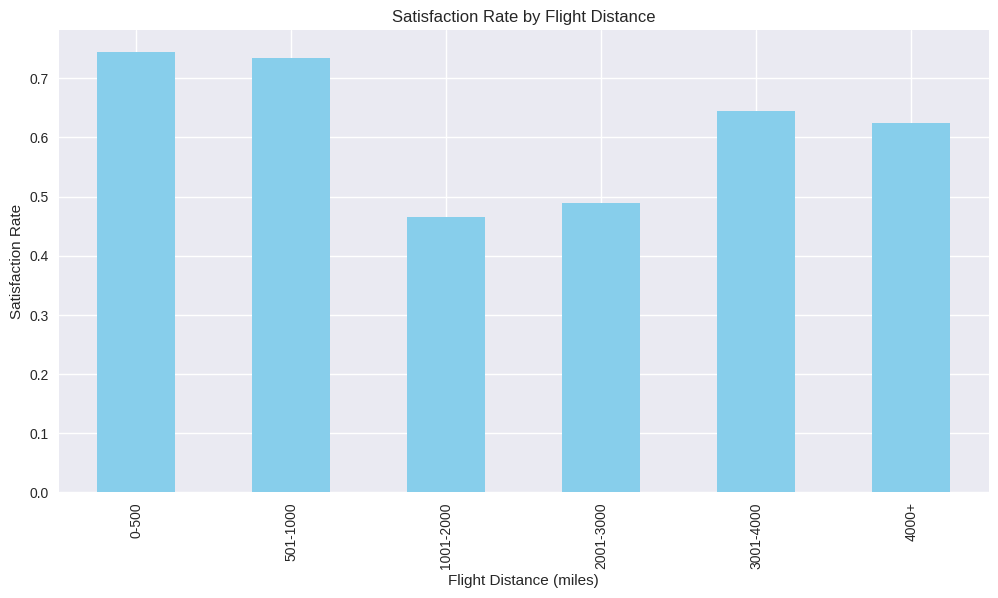

In [15]:
df['Distance_Bin'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1000, 2000, 3000, 4000, np.inf],
                            labels=['0-500', '501-1000', '1001-2000', '2001-3000', '3001-4000', '4000+'])

satisfaction_rate = df.groupby('Distance_Bin')['satisfaction'].apply(lambda x: (x == 'satisfied').mean())

plt.figure(figsize=(12, 6))
satisfaction_rate.plot(kind='bar', color='skyblue')
plt.title('Satisfaction Rate by Flight Distance')
plt.ylabel('Satisfaction Rate')
plt.xlabel('Flight Distance (miles)')
plt.show()

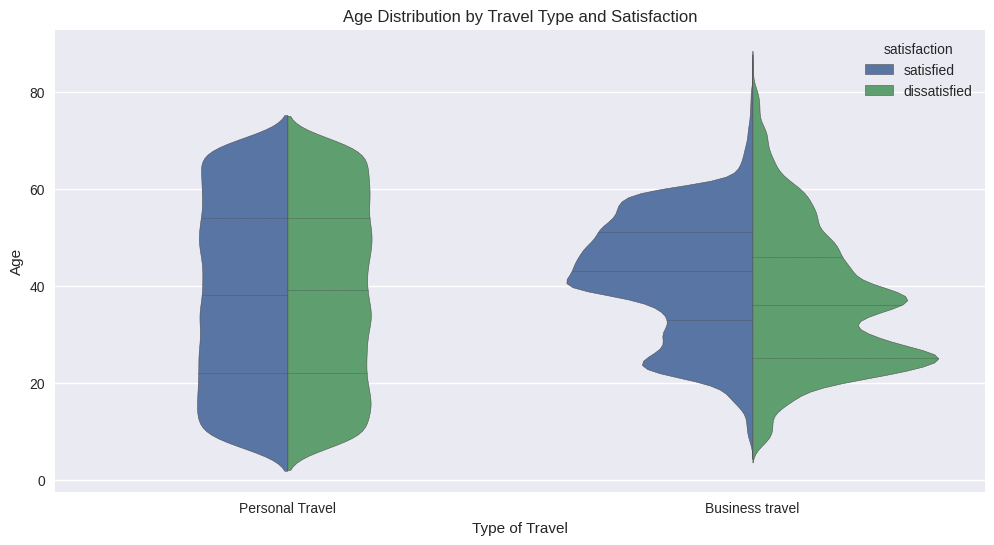

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Type of Travel', y='Age', hue='satisfaction', data=df, split=True, inner="quartile")
plt.title('Age Distribution by Travel Type and Satisfaction')
plt.show()

In [17]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

In [18]:
for cols in cat_features:
        cat_group = df.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        for i in range(0,(len(cat_group))):
            print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))


<ipython-input-18-dd07c7e5b253>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
<ipython-input-18-dd07c7e5b253>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
<ipython-input-18-dd07c7e5b253>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {

100.0 - dissatisfied are dissatisfied
100.0 - satisfied are satisfied
65.14 - Female are satisfied
55.99 - Male are dissatisfied
61.63 - Loyal Customer are satisfied
76.03 - disloyal Customer are dissatisfied
58.37 - Business travel are satisfied
53.39 - Personal Travel are dissatisfied
70.94 - Business are satisfied
60.6 - Eco are dissatisfied
57.29 - Eco Plus are dissatisfied


<ipython-input-18-dd07c7e5b253>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('{} - {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))


In [19]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_features

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Distance_Bin']

In [20]:
num_features = num_features[:-1]

In [21]:
num_features

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [22]:
for col in num_features:
    print(f'\n{col} grouped by satisfaction:')
    summary = df.groupby('satisfaction')[col].mean()  
    for satisfaction_level in summary.index:
        print(f'{satisfaction_level}: {round(summary[satisfaction_level], 2)}')



Age grouped by satisfaction:
dissatisfied: 37.47
satisfied: 41.05

Flight Distance grouped by satisfaction:
dissatisfied: 2025.71
satisfied: 1944.77

Seat comfort grouped by satisfaction:
dissatisfied: 2.47
satisfied: 3.15

Departure/Arrival time convenient grouped by satisfaction:
dissatisfied: 3.02
satisfied: 2.97

Food and drink grouped by satisfaction:
dissatisfied: 2.66
satisfied: 3.01

Gate location grouped by satisfaction:
dissatisfied: 3.01
satisfied: 2.98

Inflight wifi service grouped by satisfaction:
dissatisfied: 2.92
satisfied: 3.52

Inflight entertainment grouped by satisfaction:
dissatisfied: 2.61
satisfied: 4.02

Online support grouped by satisfaction:
dissatisfied: 2.96
satisfied: 3.98

Ease of Online booking grouped by satisfaction:
dissatisfied: 2.85
satisfied: 3.98

On-board service grouped by satisfaction:
dissatisfied: 2.97
satisfied: 3.87

Leg room service grouped by satisfaction:
dissatisfied: 3.05
satisfied: 3.84

Baggage handling grouped by satisfaction:
diss

# Preprocessing

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib

In [24]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Ease of Online booking  On-board service  Leg room service  \
0                            3                 3                 0   
1                            3                 4                 4   
2                            2                 3                 3   
3                            1                 1                 0   
4                            2                 2                 0   
...                        ...               ...               ...   
129875                       2                 3                 3   
129876                       3                 2                 3   
129877                       4                 4                 3   
129878                       3                 3                 2   
129879                       4                 5                 5   

        Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                      3                5            3                2   
1                      4                2            3                2   
2                      4                4            4                2   
3                      1                4            1                3   
4                      2                4            2                5   
...                  ...              ...          ...              ...   
129875                 4                4            4                2   
129876                 3                1            2                1   
129877                 4                2            3                2   
129878                 3                2            1                2   
129879                 5                3            3     

In [25]:
df = df.drop(columns=['Distance_Bin'])

In [26]:
df

satisfaction  Gender      Customer Type  Age   Type of Travel  \
0          satisfied  Female     Loyal Customer   65  Personal Travel   
1          satisfied    Male     Loyal Customer   47  Personal Travel   
2          satisfied  Female     Loyal Customer   15  Personal Travel   
3          satisfied  Female     Loyal Customer   60  Personal Travel   
4          satisfied  Female     Loyal Customer   70  Personal Travel   
...              ...     ...                ...  ...              ...   
129875     satisfied  Female  disloyal Customer   29  Personal Travel   
129876  dissatisfied    Male  disloyal Customer   63  Personal Travel   
129877  dissatisfied    Male  disloyal Customer   69  Personal Travel   
129878  dissatisfied    Male  disloyal Customer   66  Personal Travel   
129879  dissatisfied  Female  disloyal Customer   38  Personal Travel   

           Class  Flight Distance  Seat comfort  \
0            Eco              265             0   
1       Business             2464             0   
2            Eco             2138             0   
3            Eco              623             0   
4            Eco              354             0   
...          ...              ...           ...   
129875       Eco             1731             5   
129876  Business             2087             2   
129877       Eco             2320             3   
129878       Eco             2450             3   
129879       Eco             4307             3   

        Departure/Arrival time convenient  Food and drink  ...  \
0                                       0               0  ...   
1                                       0               0  ...   
2                                       0               0  ...   
3                                       0               0  ...   
4                                       0               0  ...   
...                                   ...             ...  ...   
129875                                  5               5  ...   
129876                                  3               2  ...   
129877                                  0               3  ...   
129878                                  2               3  ...   
129879                                  4               3  ...   

        Online support  Ease of Online booking  On-board service  \
0                    2                       3                 3   
1                    2                       3                 4   
2                    2                       2                 3   
3                    3                       1                 1   
4                    4                       2                 2   
...                ...                     ...               ...   
129875               2                       2                 3   
129876               1                       3                 2   
129877               2                       4                 4   
129878               2                       3                 3   
129879               3                       4                 5   

        Leg room service  Baggage handling  Checkin service  Cleanliness  \
0                      0                 3                5            3   
1                      4                 4                2            3   
2                      3                 4                4            4   
3                      0                 1                4            1   
4                      0                 2                4            2   
...                  ...               ...              ...          ...   
129875                 3                 4                4            4   
129876                 3                 3                1            2   
129877                 3                 4                2            3   
129878                 2                 3                2            1   
129879                 5                 5                3            3

In [27]:
print("Missing values before removal:\n", df.isnull().sum())

Missing values before removal:
 satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


In [28]:
df = df.dropna()

In [29]:
print("Missing values after removal:\n", df.isnull().sum())

Missing values after removal:
 satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-30-d450dc28c91c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-30-d450dc28c91c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-30-d450dc28c91c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [31]:
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without Attention

# XGB

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:16:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [45]:
y_pred_xg = xgb_model.predict(X_test_scaled)

Accuracy: 0.9602

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

ROC AUC Score: 0.5903


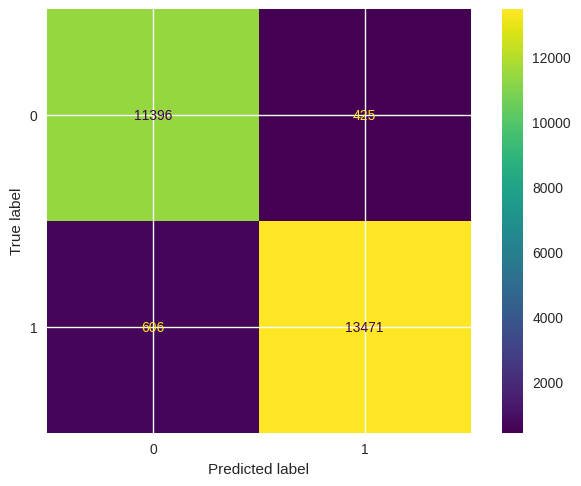

In [46]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_xg)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred_xg))

y_pred_proba_xg = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_xg)
print(f'ROC AUC Score: {roc_auc:.4f}')

predictions = xgb_model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Random Forest

In [47]:
rf_model = RandomForestClassifier(random_state=42)

In [48]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred_rf = rf_model.predict(X_test_scaled)

Random Forest Accuracy: 0.9586

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

Random Forest ROC AUC Score: 0.9936


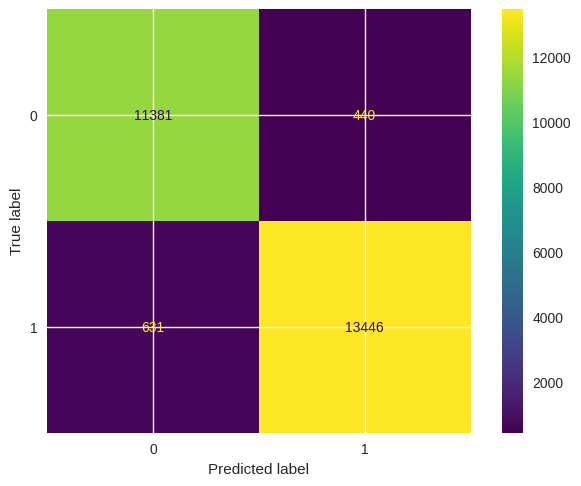

In [50]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f'Random Forest ROC AUC Score: {roc_auc_rf:.4f}')

predictions = rf_model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Deep neural nets

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
NN_model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),  
    layers.Dense(64, activation='relu'),              
    layers.Dense(32, activation='relu'),             
    layers.Dense(1, activation='sigmoid')            
])
NN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [53]:
history = NN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8791 - loss: 0.2843 - val_accuracy: 0.9270 - val_loss: 0.1712
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9306 - loss: 0.1642 - val_accuracy: 0.9350 - val_loss: 0.1532
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9407 - loss: 0.1403 - val_accuracy: 0.9427 - val_loss: 0.1334
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9446 - loss: 0.1285 - val_accuracy: 0.9454 - val_loss: 0.1254
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9504 - loss: 0.1165 - val_accuracy: 0.9456 - val_loss: 0.1242
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9508 - loss: 0.1122 - val_accuracy: 0.9486 - val_loss: 0.1153
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9547 - loss: 0.1054 - val_accuracy: 0.9493 - val_loss: 0.1134
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9539 - loss: 0.106

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Deep Neural Network Accuracy: 0.9524

Deep Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11821
           1       0.96      0.96      0.96     14077

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Deep Neural Network ROC AUC Score: 0.9931


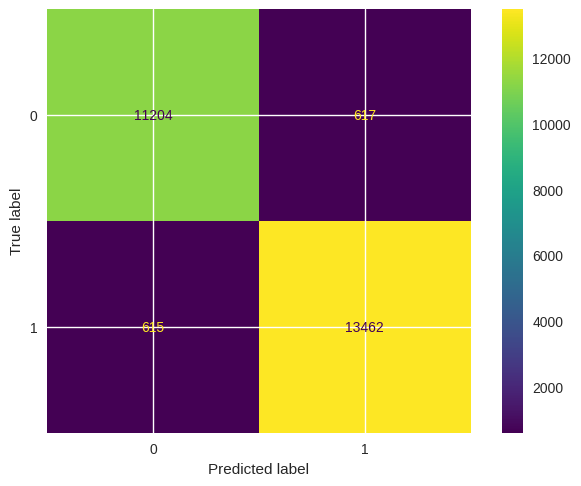

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


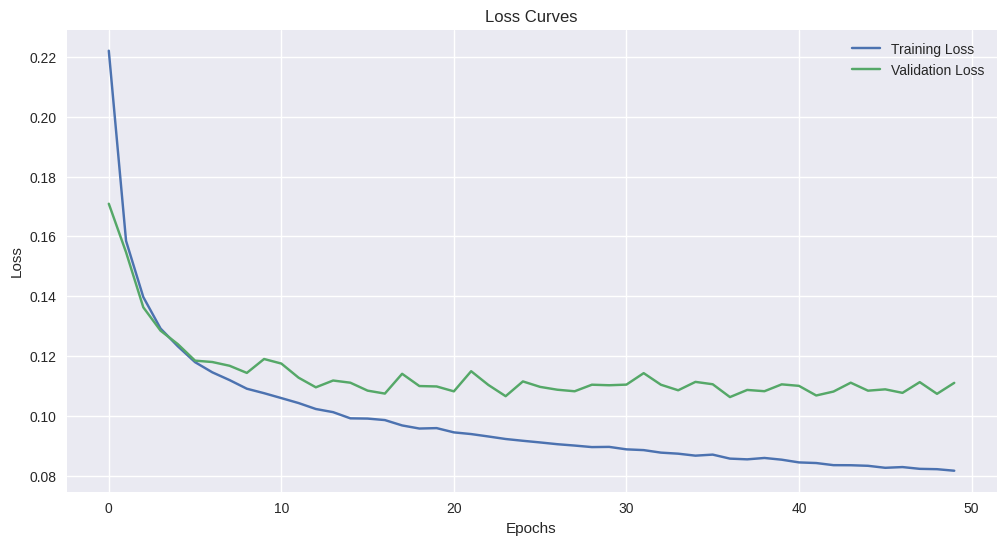

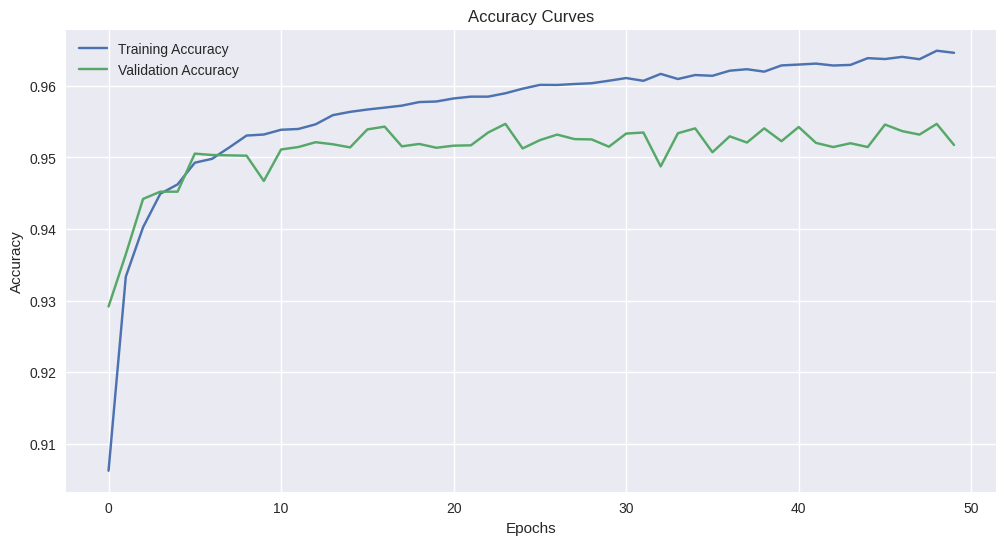

In [ ]:
y_pred_prob_NN = NN_model.predict(X_test_scaled).flatten()  
y_pred = (y_pred_prob_NN > 0.5).astype(int) 


accuracy = accuracy_score(y_test, y_pred)
print(f'Deep Neural Network Accuracy: {accuracy:.4f}')

print("\nDeep Neural Network Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob_NN)
print(f'Deep Neural Network ROC AUC Score: {roc_auc:.4f}')


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


print(history.history.keys())

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Quantum inspired NN

In [54]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import register_keras_serializable

In [55]:
@register_keras_serializable()
class QuantumLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(QuantumLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="glorot_uniform",
            trainable=True,
            name="kernel"
        )

    def call(self, inputs):
        weighted_sum = tf.matmul(inputs, self.kernel)
        return tf.nn.softplus(weighted_sum)

    def get_config(self):
        config = super(QuantumLayer, self).get_config()
        config.update({"units": self.units})
        return config

@register_keras_serializable()
class QuantumInspiredNN(Model):
    def __init__(self, input_shape, **kwargs):
        super(QuantumInspiredNN, self).__init__(**kwargs)
        self.input_shape = input_shape
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = QuantumLayer(32)
        self.dense3 = Dense(16, activation='relu')
        self.output_layer = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        output = self.output_layer(x)
        return output

    def get_config(self):
        config = super(QuantumInspiredNN, self).get_config()
        config.update({"input_shape": self.input_shape})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
input_shape = X_train_scaled.shape[1] 
QINN_model = QuantumInspiredNN(input_shape)
QINN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_QINN = QINN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8719 - loss: 0.2893 - val_accuracy: 0.9276 - val_loss: 0.1687
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9312 - loss: 0.1611 - val_accuracy: 0.9372 - val_loss: 0.1451
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9386 - loss: 0.1417 - val_accuracy: 0.9407 - val_loss: 0.1423
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9440 - loss: 0.1298 - val_accuracy: 0.9410 - val_loss: 0.1407
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9470 - loss: 0.1205 - val_accuracy: 0.9493 - val_loss: 0.1216
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9490 - loss: 0.1167 - val_accuracy: 0.9392 - val_loss: 0.1272
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9514 - loss: 0.1119 - val_accuracy: 0.9490 - val_loss: 0.1152
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9504 - loss: 0.10

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Quantum-Inspired Neural Network Accuracy: 0.9550
Quantum-Inspired Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11821
           1       0.96      0.95      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.95      0.96      0.95     25898
weighted avg       0.96      0.96      0.96     25898

Quantum-Inspired Neural Network ROC AUC Score: 0.9933


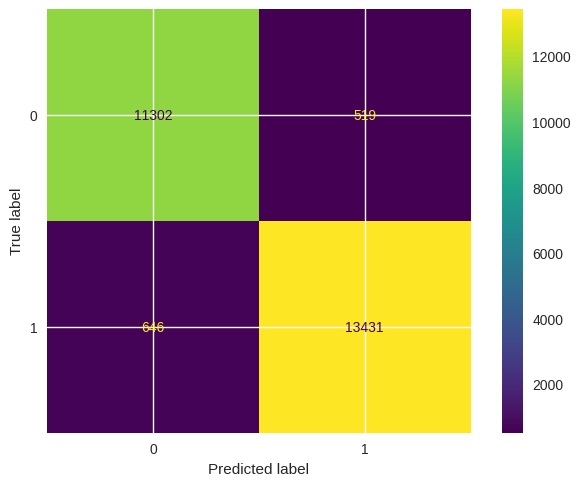

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


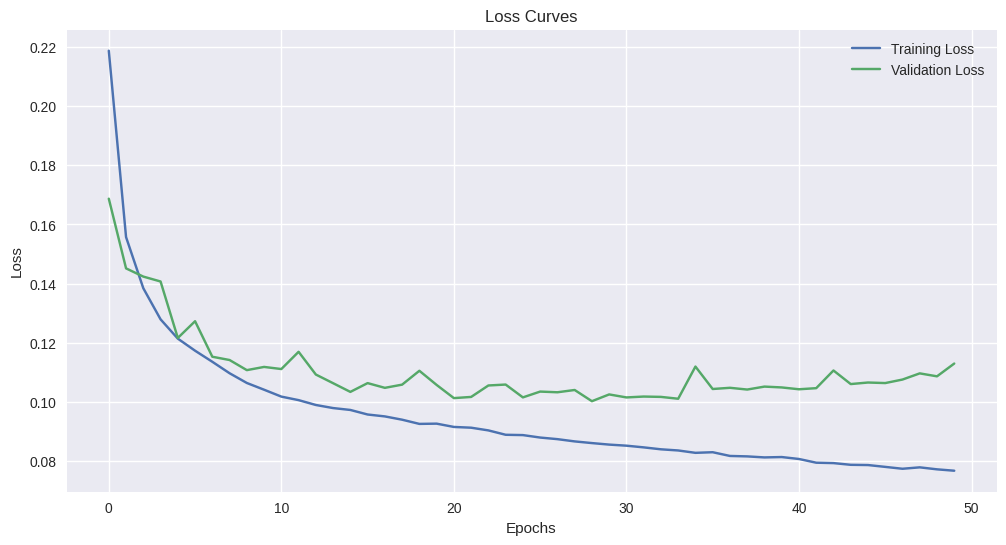

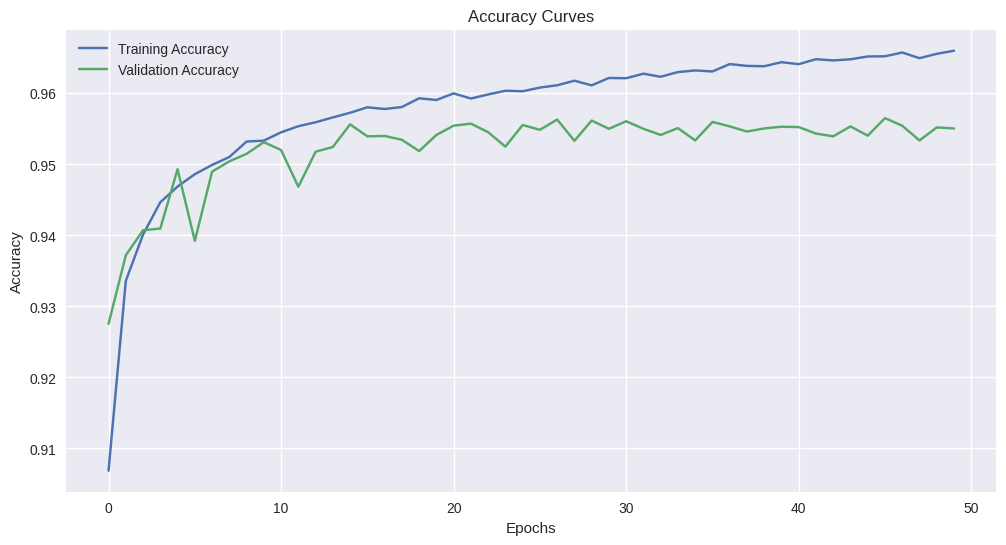

In [ ]:
y_pred = QINN_model.predict(X_test_scaled).flatten()
y_pred_classes = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Quantum-Inspired Neural Network Accuracy: {accuracy:.4f}")
print("Quantum-Inspired Neural Network Classification Report:")
print(classification_rep)
print(f"Quantum-Inspired Neural Network ROC AUC Score: {roc_auc:.4f}")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


print(history.history.keys())

plt.figure(figsize=(12, 6))
plt.plot(history_QINN.history['loss'], label='Training Loss')
plt.plot(history_QINN.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_QINN.history['accuracy'], label='Training Accuracy')
plt.plot(history_QINN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Stacking Ensemble

In [56]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import clone_model
from tensorflow.keras.utils import serialize_keras_object, deserialize_keras_object


In [57]:
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):

    def __init__(self, model, epochs=20, batch_size=32):
        self.model = model
        self.epochs = epochs
        self.batch_size = batch_size

    def fit(self, X, y):
        self.model_ = clone_model(self.model)
        self.model_.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)

        self.classes_ = np.unique(y)

        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype(int)

    def predict_proba(self, X):
        preds = self.model_.predict(X)
        return np.column_stack((1 - preds, preds))

    def __getstate__(self):
        state = self.__dict__.copy()
        state['model'] = serialize_keras_object(self.model)
        if 'model_' in state:
            state['model_'] = serialize_keras_object(state['model_'])
        return state

    def __setstate__(self, state):
        self.__dict__.update(state)
        self.model = deserialize_keras_object(state['model'])
        if 'model_' in state:
            self.model_ = deserialize_keras_object(state['model_'])

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('dnn', KerasClassifierWrapper(NN_model, epochs=20, batch_size=32)),
    ('qinn', KerasClassifierWrapper(QINN_model, epochs=50, batch_size=32))
]

meta_learner = LogisticRegression()

In [ ]:
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5 
)

stacking_clf.fit(X_train_scaled, y_train)

648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
648/648 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importa...
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('dnn',
                                KerasClassifierWrapper(model=<Sequential name=sequential, built=True>)),
                               ('qinn',
                                KerasClassifierWrapper(epochs=50,
                                                       model=<QuantumInspiredNN name=quantum_inspired_nn_1, built=True>))],
                   final_estimator=LogisticRegression())

In [ ]:
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
NN_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
QINN_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

individual_models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('Deep Neural Network', NN_model),
    ('Quantum-Inspired NN', QINN_model)
]

for name, model in individual_models:
    if isinstance(model, (RandomForestClassifier, XGBClassifier)):
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else: 
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        y_pred_proba = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
y_pred_stack = stacking_clf.predict(X_test_scaled)
y_pred_proba_stack = stacking_clf.predict_proba(X_test_scaled)[:, 1]

accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)

print("\nStacking Classifier Results:")
print(f"Accuracy: {accuracy_stack:.4f}")
print(f"ROC AUC Score: {roc_auc_stack:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_stack))

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Stacking Classifier Results:
Accuracy: 0.9621
ROC AUC Score: 0.9951
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.97     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Stacking Classifier Results:
Accuracy: 0.9621
ROC AUC Score: 0.9622


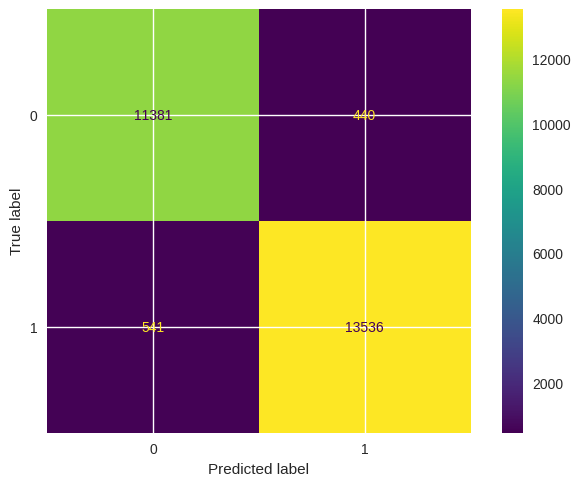

In [ ]:
predictions = stacking_clf.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)

accuracy_stack = accuracy_score(y_test, predictions)
roc_auc_stack = roc_auc_score(y_test, predicted_classes)

print("\nStacking Classifier Results:")
print(f"Accuracy: {accuracy_stack:.4f}")
print(f"ROC AUC Score: {roc_auc_stack:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

# With attention

### dnn_with_attention

In [58]:
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import register_keras_serializable

@register_keras_serializable()
class AttentionLayer(layers.Layer):
    def __init__(self, units, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
        self.u = self.add_weight(shape=(self.units, 1),
                                 initializer='glorot_uniform',
                                 trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.u, axes=1), axis=1)
        weighted_sum = inputs * attention_weights
        return weighted_sum 

    def get_config(self):
        config = super(AttentionLayer, self).get_config()
        config.update({"units": self.units})
        return config

@register_keras_serializable()
class DNNWithAttention(Model):
    def __init__(self, input_shape, **kwargs):
        super(DNNWithAttention, self).__init__(**kwargs)
        self.input_shape = input_shape
        self.dense1 = Dense(64, activation='relu')
        self.dense2 = Dense(32, activation='relu')
        self.attention = AttentionLayer(32)  
        self.flatten = Flatten() 
        self.dense3 = Dense(16, activation='relu')
        self.output_layer = Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.attention(x)  
        x = self.flatten(x) 
        x = self.dense3(x)
        output = self.output_layer(x)
        return output

    def get_config(self):
        config = super(DNNWithAttention, self).get_config()
        config.update({"input_shape": self.input_shape})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [59]:
input_shape = X_train_scaled.shape[1]  
dnn_with_attention = DNNWithAttention(input_shape)
dnn_with_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_dnn = dnn_with_attention.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8800 - loss: 0.2804 - val_accuracy: 0.9297 - val_loss: 0.1627
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9354 - loss: 0.1537 - val_accuracy: 0.9398 - val_loss: 0.1410
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9419 - loss: 0.1335 - val_accuracy: 0.9446 - val_loss: 0.1308
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9461 - loss: 0.1239 - val_accuracy: 0.9445 - val_loss: 0.1267
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9489 - loss: 0.1181 - val_accuracy: 0.9485 - val_loss: 0.1219
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9515 - loss: 0.1111 - val_accuracy: 0.9499 - val_loss: 0.1148
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9507 - loss: 0.1101 - val_accuracy: 0.9501 - val_loss: 0.1150
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9527 - loss: 0.1067 -

In [66]:
test_loss, test_accuracy = dnn_with_attention.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

810/810 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9523 - loss: 0.1134
Test Loss: 0.1127, Test Accuracy: 0.9632


810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


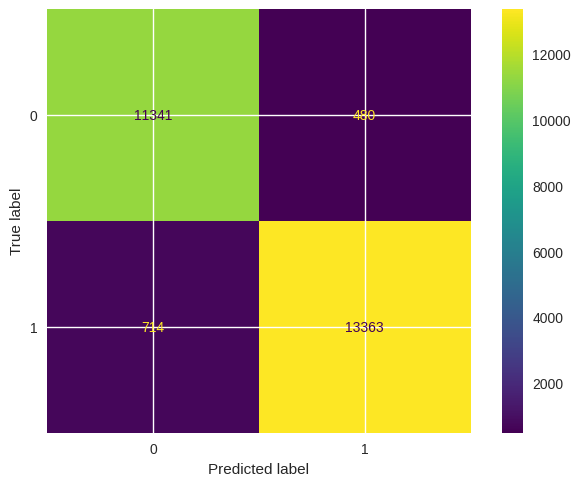

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11821
           1       0.97      0.95      0.96     14077

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


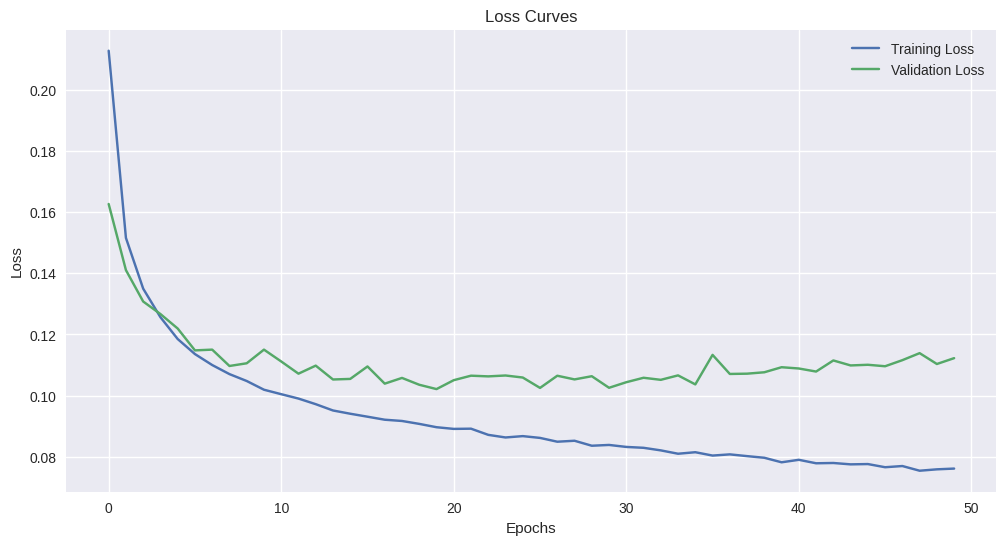

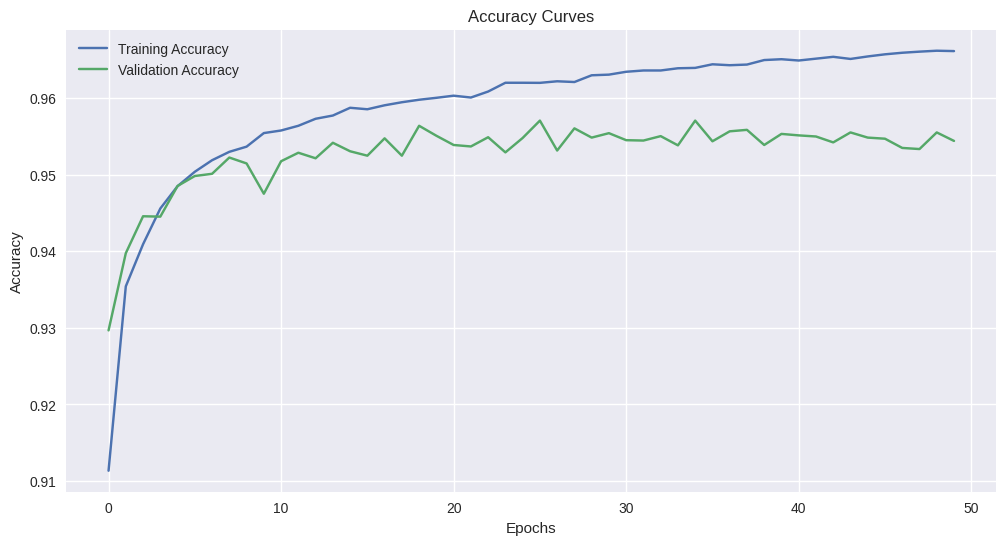

In [60]:
predictions = dnn_with_attention.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

print(history_dnn.history.keys())

plt.figure(figsize=(12, 6))
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_dnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### QINN_with_attention

In [61]:
from tensorflow.keras import layers, Model

@register_keras_serializable()
class QuantumInspiredNNWithAttention(Model):
    def __init__(self, input_shape, **kwargs):
        super(QuantumInspiredNNWithAttention, self).__init__(**kwargs)

        self.dense1 = layers.Dense(64, activation='relu')
        self.quantum_layer = QuantumLayer(32)
        self.attention_layer = AttentionLayer(32)  
        self.flatten = layers.Flatten()  
        self.dense3 = layers.Dense(16, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

        inputs = layers.Input(shape=(input_shape,))
        x = self.dense1(inputs)
        x = self.quantum_layer(x)
        x = self.attention_layer(x)  
        x = self.flatten(x)  
        x = self.dense3(x)
        outputs = self.output_layer(x)

        self.model = Model(inputs=inputs, outputs=outputs)

    def call(self, inputs):
        return self.model(inputs)

    def get_config(self):
        config = super(QuantumInspiredNNWithAttention, self).get_config()
        config.update({"input_shape": self.input_shape})
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [62]:
input_shape = X_train_scaled.shape[1]
QINN_model_with_attention = QuantumInspiredNNWithAttention(input_shape)
QINN_model_with_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history_QINN_model=QINN_model_with_attention.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8713 - loss: 0.2961 - val_accuracy: 0.9275 - val_loss: 0.1758
Epoch 2/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9280 - loss: 0.1695 - val_accuracy: 0.9360 - val_loss: 0.1513
Epoch 3/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9353 - loss: 0.1497 - val_accuracy: 0.9423 - val_loss: 0.1382
Epoch 4/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9416 - loss: 0.1359 - val_accuracy: 0.9362 - val_loss: 0.1390
Epoch 5/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9448 - loss: 0.1263 - val_accuracy: 0.9441 - val_loss: 0.1252
Epoch 6/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9483 - loss: 0.1181 - val_accuracy: 0.9465 - val_loss: 0.1246
Epoch 7/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9501 - loss: 0.1158 - val_accuracy: 0.9480 - val_loss: 0.1207
Epoch 8/50
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9499 - loss: 0.1

810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9570 - loss: 0.1000
Test Loss: 0.1024, Test Accuracy: 0.9657
810/810 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


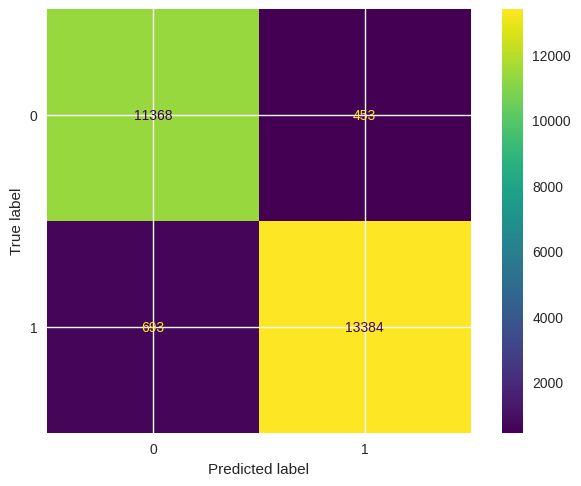

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11821
           1       0.97      0.95      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.95      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


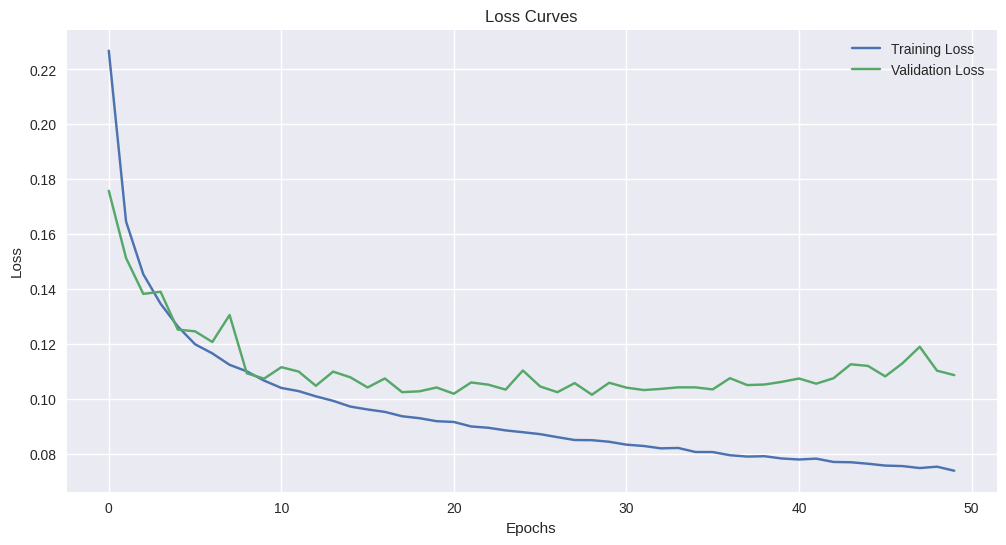

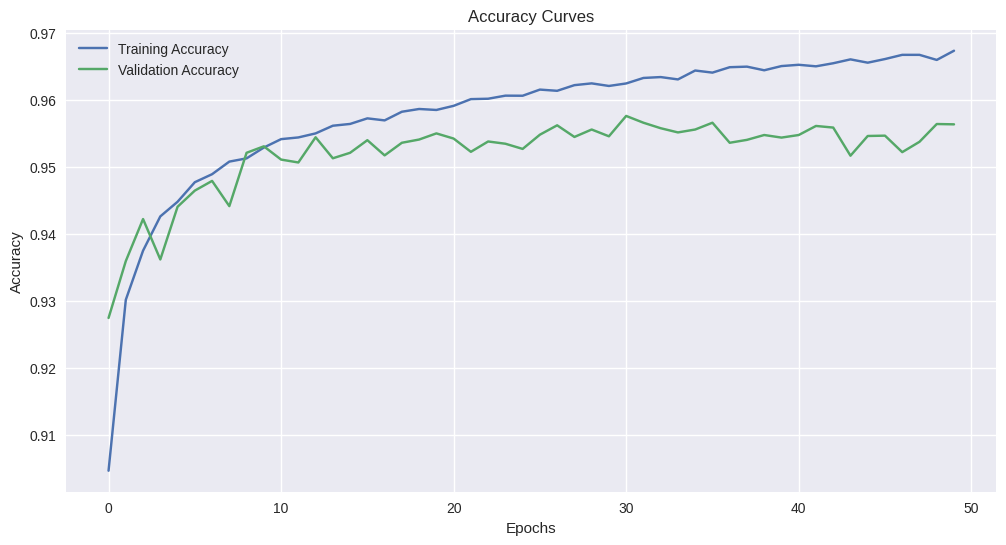

In [65]:
test_loss, test_accuracy = QINN_model_with_attention.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

predictions = QINN_model_with_attention.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))


print(history_QINN_model.history.keys())

plt.figure(figsize=(12, 6))
plt.plot(history_QINN_model.history['loss'], label='Training Loss')
plt.plot(history_QINN_model.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history_QINN_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_QINN_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### STACKING_wth_attention

In [66]:
pip install scikeras

In [67]:
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import StackingClassifier
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
def create_QINN_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = QuantumLayer(32)(x)  
    x = AttentionLayer(32)(x)  
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

def create_DNN_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = AttentionLayer(32)(x) 
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [69]:
input_shape = X_train_scaled.shape[1:]

qinn_model = KerasClassifier(model=create_QINN_model, input_shape=input_shape, epochs=5, batch_size=32, verbose=0)
dnn_model = KerasClassifier(model=create_DNN_model, input_shape=input_shape, epochs=5, batch_size=32, verbose=0)

In [70]:
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('dnn', dnn_model),
        ('qinn', qinn_model)
    ],
    final_estimator=LogisticRegression(random_state=42)
)

stacking_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:59:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:01:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:01:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:01:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:01:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lear...
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('dnn',
                                KerasClassifier(batch_size=32, epochs=5, input_shape=(22,), model=<function create_DNN_model at 0x79e6e1c30670>, verbose=0)),
                               ('qinn',
                                KerasClassifier(batch_size=32, epochs=5, input_shape=(22,), model=<function create_QINN_model at 0x79e6bcf2af80>, verbose=0))],
                   final_estimator=LogisticRegression(random_state=42))

In [ ]:
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
dnn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=0)
qinn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

individual_models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('Deep Neural Network with attention', dnn_model),
    ('Quantum-Inspired NN with attention', qinn_model)
]

for name, model in individual_models:
    if isinstance(model, (RandomForestClassifier, XGBClassifier)):
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:  
        y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        y_pred_proba = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)


Stacking Classifier Results:
Accuracy: 0.9673
ROC AUC Score: 0.9673


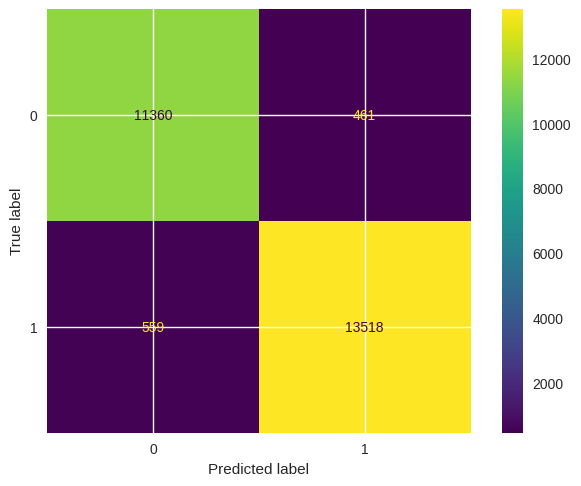

In [71]:
predictions = stacking_model.predict(X_test_scaled)
predicted_classes = (predictions > 0.5).astype(int)

accuracy_stack = accuracy_score(y_test, predictions)
roc_auc_stack = roc_auc_score(y_test, predicted_classes)

print("\nStacking Classifier Results:")
print(f"Accuracy: {accuracy_stack:.4f}")
print(f"ROC AUC Score: {roc_auc_stack:.4f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# LIME

In [72]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d45b3d508b03ec2bdb085c2110b3d4361bb23af7a44f8682b5fa5b0c59559102
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [73]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

In [74]:
explainer = LimeTabularExplainer(
    X_train_scaled,  # Your scaled training data
    feature_names=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'], 
    class_names=['Not Satisfied', 'Satisfied'],  
    mode='classification'
)

### Lime on dnn_model_with_attention

In [75]:
def predict_proba(x):
    proba = dnn_model.predict(x).astype(float)
    return np.hstack([1 - proba, proba])  

In [81]:
from scipy.special import softmax

def predict_proba(x):
    raw_preds = dnn_with_attention.predict(x).astype(float).flatten()
    prob_preds = np.vstack([1 - raw_preds, raw_preds]).T 
    return prob_preds


In [82]:
instance = X_test_scaled[i]

In [83]:
exp_dnn_attention = explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_proba,
    num_features=22
)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [84]:
exp_dnn_attention.show_in_notebook(show_table=True, show_all=False)

### Lime on qinn_model_with_attention

In [85]:
def predict_fn(instance):
    instance = instance.reshape(instance.shape[0], 1) if instance.ndim == 1 else instance
    preds = QINN_model_with_attention.predict(instance)

    if preds.ndim == 1 or preds.shape[1] == 1:
        preds = np.hstack([1 - preds.reshape(-1, 1), preds.reshape(-1, 1)])
    return preds

In [86]:
exp_qinn_attention = explainer.explain_instance(
    instance.flatten(), 
    predict_fn,         
    num_features=10    
)

exp_qinn_attention.show_in_notebook(show_table=True, show_all=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


### Lime on ensmeble_with_attention

In [87]:
def predict_fn_stacking(instance):
    preds = stacking_model.predict_proba(instance)
    return preds 

In [88]:
instance_to_explain = X_test_scaled[0].reshape(1, -1) 

exp_stacking_attention = explainer.explain_instance(
    instance_to_explain.flatten(),  
    predict_fn_stacking,            
    num_features=10                 
)

exp_stacking_attention.show_in_notebook(show_table=True, show_all=False)


# Global Explainability Method: Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance

feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


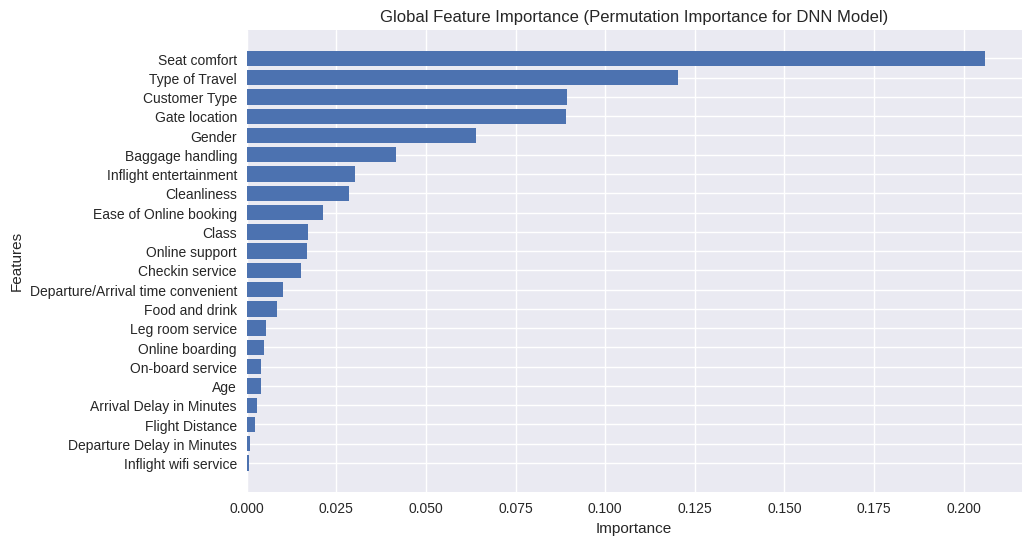

In [ ]:
def nn_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = (y_pred > 0.5).astype(int) 
    return accuracy_score(y, y_pred_classes)

result = permutation_importance(
    dnn_model,
    X_test_scaled,
    y_test,
    scoring=nn_scorer,
    n_repeats=10,
    random_state=42
)

importances = result.importances_mean
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx]) 
plt.title("Global Feature Importance (Permutation Importance for DNN Model)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

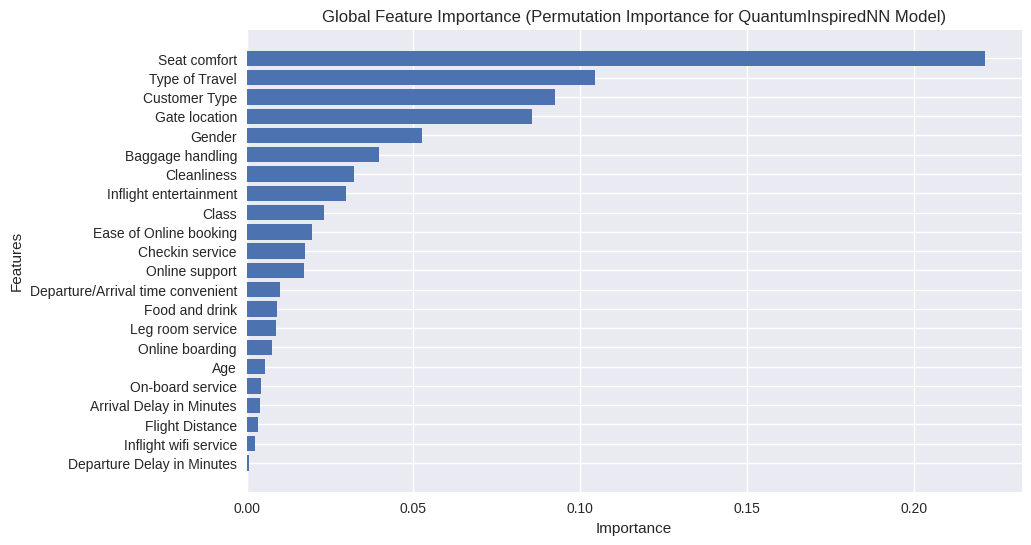

In [ ]:
def qinn_scorer(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = (y_pred > 0.5).astype(int)
    return accuracy_score(y, y_pred_classes)

result = permutation_importance(
    qinn_model,
    X_test_scaled,
    y_test,
    scoring=qinn_scorer,
    n_repeats=10,
    random_state=42
)

importances = result.importances_mean
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_idx]) 
plt.title("Global Feature Importance (Permutation Importance for QuantumInspiredNN Model)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


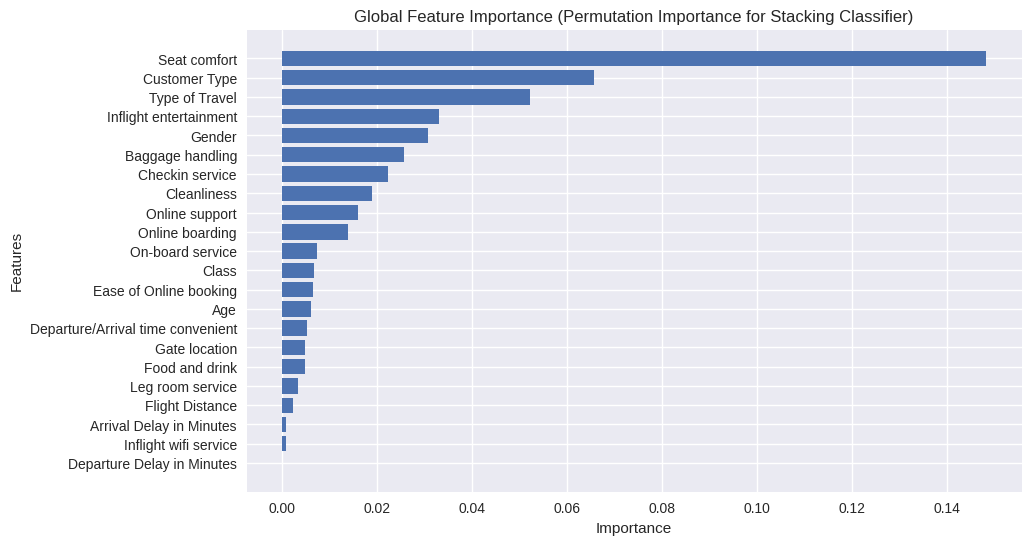

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

def stacking_scorer(model, X, y):
    y_pred = model.predict(X)
    return accuracy_score(y, y_pred)

stacking_result = permutation_importance(
    stacking_model,
    X_test_scaled,
    y_test,
    scoring=stacking_scorer,
    n_repeats=10,
    random_state=42
)

stacking_importances = stacking_result.importances_mean
sorted_stacking_idx = stacking_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(stacking_importances)), stacking_importances[sorted_stacking_idx], align='center')
plt.yticks(range(len(stacking_importances)), [feature_names[i] for i in sorted_stacking_idx]) 
plt.title("Global Feature Importance (Permutation Importance for Stacking Classifier)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# ALE

In [ ]:
pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [ ]:
from alibi.explainers.ale import ALE
import matplotlib.pyplot as plt

In [ ]:
def plot_ale(model, X_train_scaled, feature_names, features_idx, model_name):
    ale = ALE(model.predict, feature_names=feature_names)
    explanation = ale.explain(X_train_scaled)

    fig, axes = plt.subplots(nrows=1, ncols=len(features_idx), figsize=(15, 5))
    for i, feature_idx in enumerate(features_idx):
        axes[i].plot(explanation.ale_values[feature_idx])
        axes[i].set_title(f'ALE of {feature_names[feature_idx]} ({model_name})')
        axes[i].set_xlabel(f'{feature_names[feature_idx]}')
        axes[i].set_ylabel('ALE')

    plt.tight_layout()
    plt.show()

In [ ]:
features_idx = [6, 3, 1]
feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                 'Food and drink', 'Gate location', 'Inflight wifi service',
                 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                 'On-board service', 'Leg room service', 'Baggage handling',
                 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

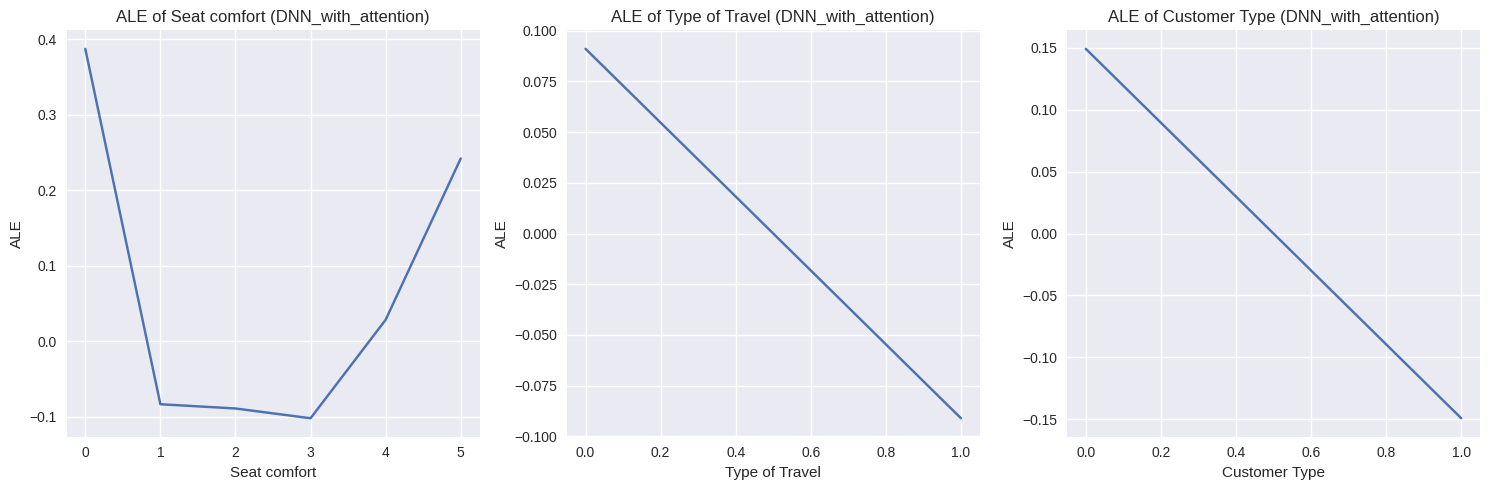

In [ ]:
plot_ale(dnn_model, X_train_scaled, feature_names, features_idx, model_name='DNN_with_attention')

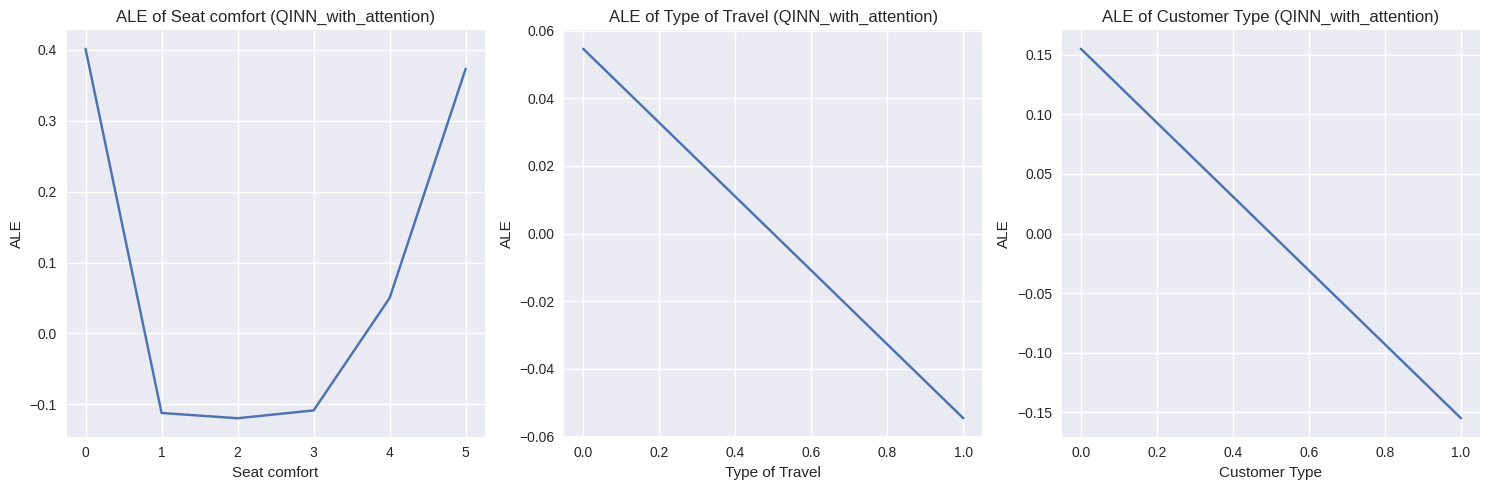

In [ ]:
plot_ale(qinn_model, X_train_scaled, feature_names, features_idx, model_name='QINN_with_attention')

### Integrated gradients

### DNN_with_attention

In [ ]:
def create_DNN_model(input_shape):
    inputs = layers.Input(shape=(input_shape,)) 
    x = layers.Dense(64, activation='relu')(inputs)
    x = AttentionLayer(32)(x) 
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
input_shape = X_train_scaled.shape[1]  
dnn_keras_model = create_DNN_model(input_shape)

In [ ]:
baseline = tf.zeros_like(X_test_scaled[0].reshape(1, -1)) 
integrated_grads_dnn_attention = integrated_gradients(X_test_scaled[0].reshape(1, -1), dnn_keras_model, baseline)

In [ ]:
def normalize_integrated_gradients(integrated_grads):
    integrated_grads = tf.reduce_sum(integrated_grads, axis=0)

    max_abs_value = tf.reduce_max(tf.abs(integrated_grads))
    if max_abs_value != 0: 
        norm_grads = integrated_grads / max_abs_value
    else:
        norm_grads = integrated_grads 

    return norm_grads


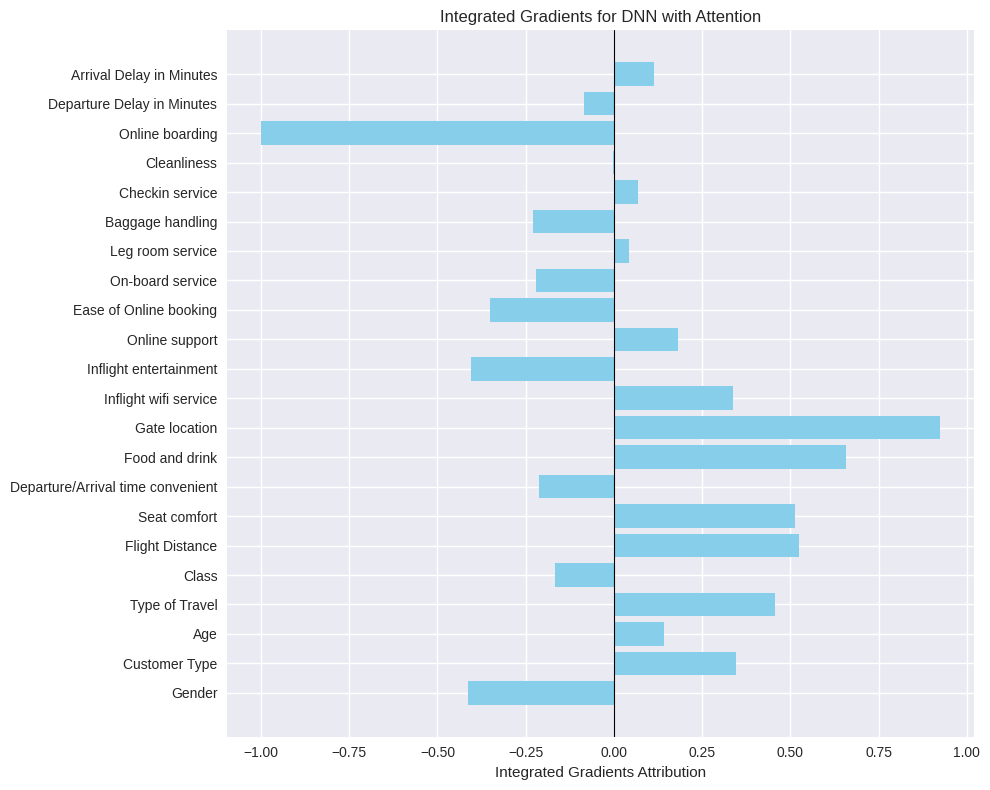

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

norm_integrated_grads = normalize_integrated_gradients(integrated_grads_dnn_attention)
norm_integrated_grads = norm_integrated_grads.numpy()  

feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
                 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
                 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(10, 8))
plt.barh(feature_names, norm_integrated_grads, color='skyblue')

plt.axvline(0, color='black', linewidth=0.8) 
plt.xlabel('Integrated Gradients Attribution')
plt.title('Integrated Gradients for DNN with Attention')
plt.tight_layout()


### QINN_with_attention

In [ ]:
def create_QINN_model(input_shape):
    inputs = layers.Input(shape=(input_shape,)) 
    x = layers.Dense(64, activation='relu')(inputs)
    x = QuantumLayer(32)(x)  
    x = AttentionLayer(32)(x) 
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
input_shape = X_train_scaled.shape[1] 
qinn_keras_model = create_QINN_model(input_shape)

In [ ]:
baseline = tf.zeros_like(X_test_scaled[0].reshape(1, -1)) 
integrated_grads_qinn_attention = integrated_gradients(X_test_scaled[0].reshape(1, -1), qinn_keras_model, baseline)

In [ ]:
def normalize_integrated_gradients(integrated_grads):
    integrated_grads = tf.reduce_sum(integrated_grads, axis=0)
    max_abs_value = tf.reduce_max(tf.abs(integrated_grads))
    if max_abs_value != 0: 
        norm_grads = integrated_grads / max_abs_value  
    else:
        norm_grads = integrated_grads 

    return norm_grads


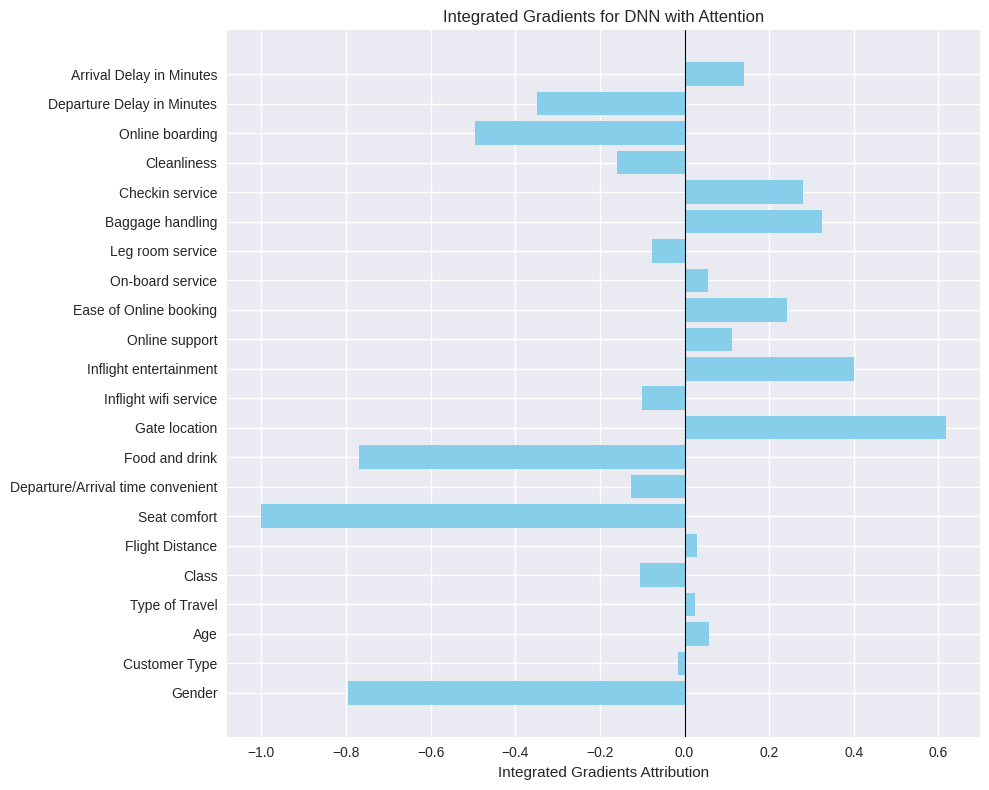

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

norm_integrated_grads = normalize_integrated_gradients(integrated_grads_qinn_attention)
norm_integrated_grads = norm_integrated_grads.numpy() 

feature_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
                 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
                 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
                 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
                 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
                 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(10, 8))
plt.barh(feature_names, norm_integrated_grads, color='skyblue')

plt.axvline(0, color='black', linewidth=0.8) 
plt.xlabel('Integrated Gradients Attribution')
plt.title('Integrated Gradients for DNN with Attention')
plt.tight_layout()
